In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
# Load the dataset
file_path = 'VNM ETF Stock Price History.csv'
vnm_data = pd.read_csv(file_path)
vnm_data['Date'] = pd.to_datetime(vnm_data['Date'])
vnm_data.set_index('Date', inplace=True)
vnm_data_price = vnm_data[['Price']]

In [3]:
# Apply ETS for each split, plot the results, and calculate metrics
splits = [0.8, 0.9, 0.7]
metrics = {}

In [4]:
# Function to apply ETS model and forecast, including 30 days future forecast
def apply_ets_extended(dataframe, split_ratio):
    split_point = int(len(dataframe) * split_ratio)
    train, test = dataframe[:split_point], dataframe[split_point:]

    model = ExponentialSmoothing(train, trend='add', seasonal=None, damped_trend=False, initialization_method="estimated")
    fitted_model = model.fit()

    test_predictions = fitted_model.forecast(steps=len(test))
    future_forecast = fitted_model.forecast(steps=len(test) + 30)[-30:]

    return train, test, test_predictions, future_forecast, fitted_model

In [5]:
def plot_ets_extended(train, test, test_predictions, future_forecast, title):
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train Data')
    plt.plot(test, label='Test Data')
    plt.plot(test.index, test_predictions, label='Predict', color='orange')
    
    future_dates = pd.date_range(start=test.index[-1], periods=len(future_forecast) + 1, freq='D')[1:]
    plt.plot(future_dates, future_forecast, label='Predict Future 30 days', color='green', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [6]:
# Function to calculate evaluation metrics
def calculate_metrics_safe(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    if len(actual) != len(predicted):
        raise ValueError("The lengths of actual and predicted values do not match.")

    epsilon = 1e-8  # Small constant to avoid division by zero
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100
    return rmse, mae, mape

C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported i

Metrics for split 80:20
RMSE: 6821.61
MAE: 5194.34
MAPE: 35.94%



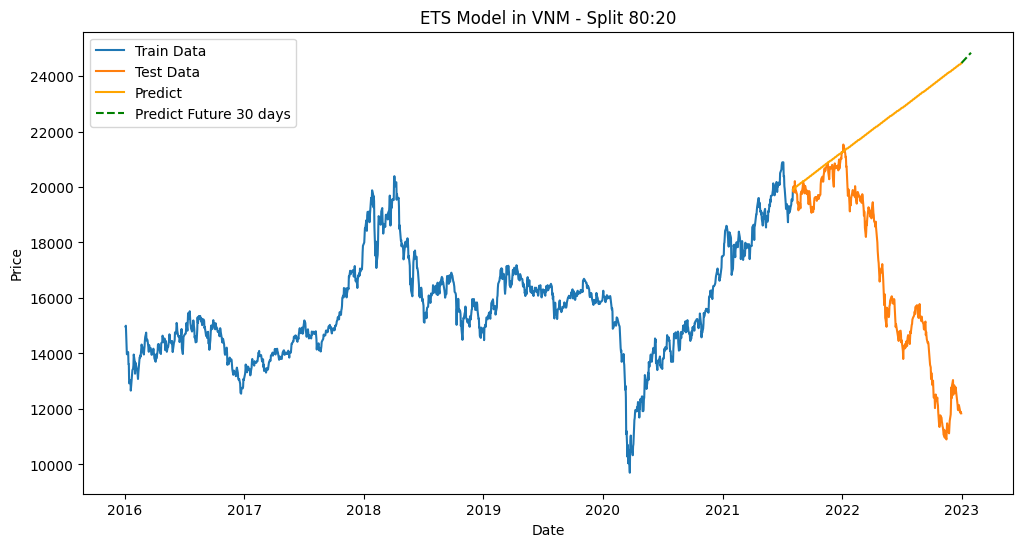

In [7]:
split = 0.8
train, test, test_predictions, future_forecast, model = apply_ets_extended(vnm_data_price, split)

# Calculate the metrics
rmse, mae, mape = calculate_metrics_safe(test, test_predictions)
metrics[split] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Print the metrics
print(f'Metrics for split {int(split*100)}:{round((1-split)*100)}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%\n')

# Plot the results
plot_ets_extended(train, test, test_predictions, future_forecast, f'ETS Model in VNM - Split {int(split*100)}:{round((1-split)*100)}')

C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported i

Metrics for split 90:10
RMSE: 2718.79
MAE: 2537.72
MAPE: 21.06%



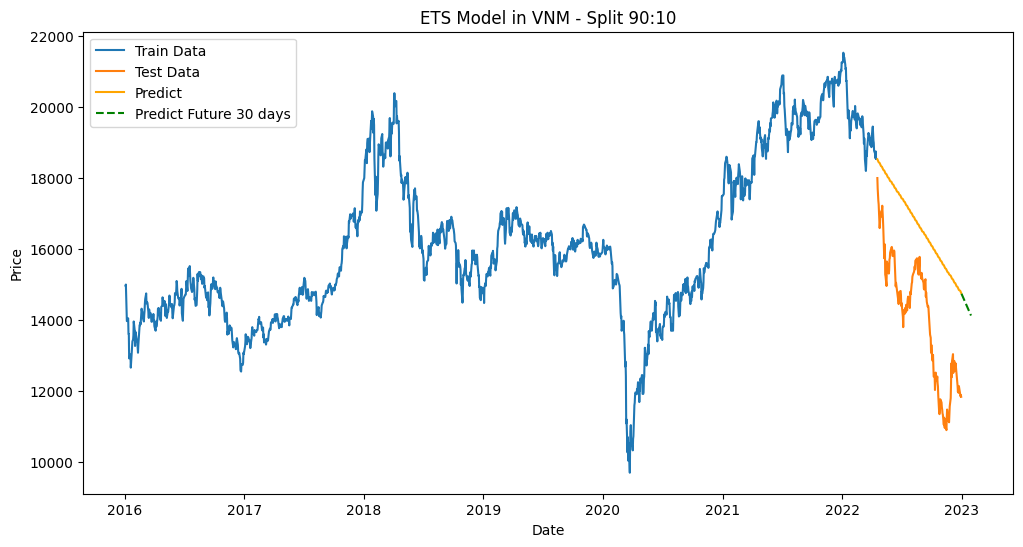

In [8]:
split = 0.9
train, test, test_predictions, future_forecast, model = apply_ets_extended(vnm_data_price, split)

# Calculate the metrics
rmse, mae, mape = calculate_metrics_safe(test, test_predictions)
metrics[split] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Print the metrics
print(f'Metrics for split {int(split*100)}:{round((1-split)*100)}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%\n')

# Plot the results
plot_ets_extended(train, test, test_predictions, future_forecast, f'ETS Model in VNM - Split {int(split*100)}:{round((1-split)*100)}')

C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Ngo Phat\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported i

Metrics for split 70:30
RMSE: 5925.78
MAE: 3981.66
MAPE: 25.94%



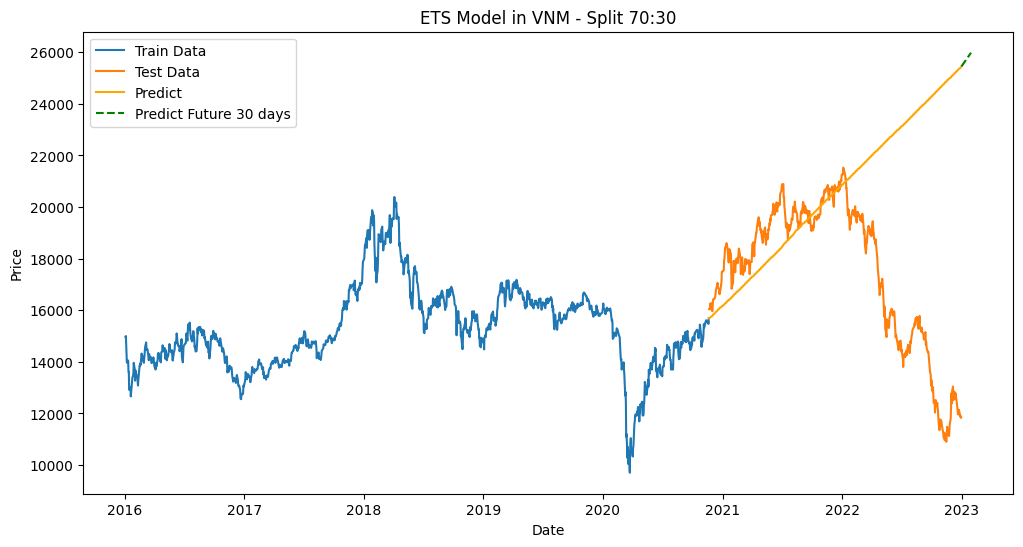

In [9]:
split = 0.7
train, test, test_predictions, future_forecast, model = apply_ets_extended(vnm_data_price, split)

# Calculate the metrics
rmse, mae, mape = calculate_metrics_safe(test, test_predictions)
metrics[split] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Print the metrics
print(f'Metrics for split {int(split*100)}:{round((1-split)*100)}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}%\n')

# Plot the results
plot_ets_extended(train, test, test_predictions, future_forecast, f'ETS Model in VNM - Split {int(split*100)}:{round((1-split)*100)}')